Predict how likely individuals are to receive their seasonal flu vaccines based on thrir socio economic factors
Factors affecting likelihood of acceptance of vaccines

### Imports and Reading Data

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)


In [2]:
df_train_features = pd.read_csv("training_set_features.csv") # X_train

In [3]:
df_train_labels = pd.read_csv("training_set_labels.csv") #y_train

In [4]:
df_test_features = pd.read_csv("test_set_features.csv")  #X_test data set

### Data Understanding

In [5]:
df_train_features.shape

(26707, 36)

The train features data has 36 columns and 26707 rows

In [6]:
df_train_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
df_train_features.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [8]:
df_train_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [9]:
df_train_features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [10]:
df_train_labels.shape

(26707, 3)

The train labels data has 3 columns and 26707 rows 

In [11]:
df_train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [12]:
df_train_labels.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [13]:
df_train_labels.dtypes

respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

In [14]:
df_train_labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [15]:
df_train_labels.mode()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0.0,0.0
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
...,...,...,...
26702,26702,NaN,NaN
26703,26703,NaN,NaN
26704,26704,NaN,NaN
26705,26705,NaN,NaN


In [16]:
mode_value_counts = df_train_labels.apply(lambda x: x.value_counts().iloc[0], axis=0)

print(mode_value_counts)

respondent_id           1
h1n1_vaccine        21033
seasonal_vaccine    14272
dtype: int64


We see that 21,033 respondents reveived the h1n1 vaccine while 14,272 respondents received the seasonal vaccine.

For this project , i will focus on the seasonal vaccine potential target respondents.

### Data Preparation

#### Training Data 

In [17]:
# dropping the h1n1 column from the train labels data set
df_train_labels = df_train_labels.drop('h1n1_vaccine', axis=1)

print(df_train_labels)

       respondent_id  seasonal_vaccine
0                  0                 0
1                  1                 1
2                  2                 0
3                  3                 1
4                  4                 0
...              ...               ...
26702          26702                 0
26703          26703                 0
26704          26704                 1
26705          26705                 0
26706          26706                 0

[26707 rows x 2 columns]


In [18]:
# dropping the h1n1 related columns from the train features  data set
columns_to_drop = ['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc']
df_train_features_dropped = df_train_features.drop(columns_to_drop, axis=1)

In [19]:
df_train_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [20]:
# merging the train features and the train labels to form my merged training data set

df_train = pd.merge(df_train_labels, df_train_features_dropped, on='respondent_id', how='inner')
df_train.shape

(26707, 31)

In [21]:
df_train.head()

,respondent_id,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [22]:
df_train.tail()

,respondent_id,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [23]:
df_train.dtypes

respondent_id                    int64
seasonal_vaccine                 int64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status               object
hhs_geo_region           

In [24]:
df_train.mode()

,respondent_id,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26703,26703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26704,26704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26705,26705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for column in df_train.columns:
    print(f"Counts for column '{column}':")
    print(df_train[column].value_counts())
    print()

Counts for column 'respondent_id':
2047     1
7657     1
3371     1
13612    1
15661    1
        ..
12979    1
2740     1
693      1
6838     1
0        1
Name: respondent_id, Length: 26707, dtype: int64

Counts for column 'seasonal_vaccine':
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Counts for column 'behavioral_antiviral_meds':
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

Counts for column 'behavioral_avoidance':
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

Counts for column 'behavioral_face_mask':
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

Counts for column 'behavioral_wash_hands':
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

Counts for column 'behavioral_large_gatherings':
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

Counts for column 'behavioral_outside_home':
0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

Coun

In [26]:
# further drop unnecessary columns in the train data
columns_to_drop3 = ['respondent_id','hhs_geo_region','employment_industry','employment_occupation','behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face','census_msa', 'household_adults', 'household_children']
df_train = df_train.drop(columns_to_drop3, axis=1)

In [27]:
# df_train = df_train.reset_index(drop=True)

In [28]:
df_train.head()

,seasonal_vaccine,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status
0,0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force
1,1,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed
2,0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed
3,1,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force
4,0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed


In [29]:
df_train.describe()

,seasonal_vaccine,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
count,26707.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26245.000000,26193.000000,26170.000000
mean,0.465608,0.329735,0.283261,0.082590,0.111918,0.87972,4.025986,2.719162,2.118112
std,0.498825,0.470126,0.450591,0.275266,0.315271,0.32530,1.086565,1.385055,1.332950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seasonal_vaccine             26707 non-null  int64  
 1   doctor_recc_seasonal         24547 non-null  float64
 2   chronic_med_condition        25736 non-null  float64
 3   child_under_6_months         25887 non-null  float64
 4   health_worker                25903 non-null  float64
 5   health_insurance             14433 non-null  float64
 6   opinion_seas_vacc_effective  26245 non-null  float64
 7   opinion_seas_risk            26193 non-null  float64
 8   opinion_seas_sick_from_vacc  26170 non-null  float64
 9   age_group                    26707 non-null  object 
 10  education                    25300 non-null  object 
 11  race                         26707 non-null  object 
 12  sex                          26707 non-null  object 
 13  income_poverty  

#### Check for missing data

In [31]:
#checking for missing data
df_train.isna().sum()

seasonal_vaccine                   0
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
dtype: int64

In [32]:
missing_percentage = (df_train.isnull().mean() * 100).round(2)
missing_percentage

seasonal_vaccine                0.00
doctor_recc_seasonal            8.09
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
health_insurance               45.96
opinion_seas_vacc_effective     1.73
opinion_seas_risk               1.92
opinion_seas_sick_from_vacc     2.01
age_group                       0.00
education                       5.27
race                            0.00
sex                             0.00
income_poverty                 16.56
marital_status                  5.27
rent_or_own                     7.65
employment_status               5.48
dtype: float64

In [33]:
#inspect the data for treatment of missing values 

for column in df_train.columns:
    print(f"Counts for column '{column}':")
    print(df_train[column].value_counts())
    print()

Counts for column 'seasonal_vaccine':
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Counts for column 'doctor_recc_seasonal':
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

Counts for column 'chronic_med_condition':
0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

Counts for column 'child_under_6_months':
0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

Counts for column 'health_worker':
0.0    23004
1.0     2899
Name: health_worker, dtype: int64

Counts for column 'health_insurance':
1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

Counts for column 'opinion_seas_vacc_effective':
4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64

Counts for column 'opinion_seas_risk':
2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: opinion_seas_risk, dtype: int64

Counts for column 'opinion_seas_sick_from_vacc':
1.0    11870
2.0     7

The health insurance column has  46% missing data. This is quite significant. I will create another catergory called "Unknown" to represent missing values. This will help preserve the missingness information and will prevent bias towards the most frequent category.

In [34]:
df_train['health_insurance'].fillna('Unknown', inplace=True)

The income column has 17% missing data. This is quite significant. I will create another catergory called "Unknown" to represent missing values. This will help preserve the missingness information and will prevent bias towards the most frequent category. 

In [35]:
df_train['income_poverty'].fillna('Unknown', inplace=True)

The rent or own column has  8% missing data. I will fill the missing values with the mode of the column.  

In [36]:
mode_value = df_train['rent_or_own'].mode()[0]
df_train['rent_or_own'].fillna(mode_value, inplace=True)

The doctor_recc_seasonal column has  8% missing data. I will fill the missing values with the mode of the column.  

In [37]:
mode_value = df_train['doctor_recc_seasonal'].mode()[0]
df_train['doctor_recc_seasonal'].fillna(mode_value, inplace=True)

The education column has  5.27% missing data. I will fill the missing values with the mode of the column.  

In [38]:
mode_value = df_train['education'].mode()[0]
df_train['education'].fillna(mode_value, inplace=True)

The marital status column has  5.27% missing data. I will fill the missing values with the mode of the column. 

In [39]:
mode_value = df_train['marital_status'].mode()[0]
df_train['marital_status'].fillna(mode_value, inplace=True)

The employment status column has 5.48% missing data. I will fill the missing values with the mode of the column.

In [40]:
mode_value = df_train['employment_status'].mode()[0]
df_train['employment_status'].fillna(mode_value, inplace=True)

In [41]:
#recheck the missing values percentages
missing_percentage = (df_train.isnull().mean() * 100).round(2)
missing_percentage

seasonal_vaccine               0.00
doctor_recc_seasonal           0.00
chronic_med_condition          3.64
child_under_6_months           3.07
health_worker                  3.01
health_insurance               0.00
opinion_seas_vacc_effective    1.73
opinion_seas_risk              1.92
opinion_seas_sick_from_vacc    2.01
age_group                      0.00
education                      0.00
race                           0.00
sex                            0.00
income_poverty                 0.00
marital_status                 0.00
rent_or_own                    0.00
employment_status              0.00
dtype: float64

In [42]:
# I drop the rest of the missing data

df_train.dropna(axis=0, inplace=True)

In [43]:
df_train.shape

(25548, 17)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seasonal_vaccine             25548 non-null  int64  
 1   doctor_recc_seasonal         25548 non-null  float64
 2   chronic_med_condition        25548 non-null  float64
 3   child_under_6_months         25548 non-null  float64
 4   health_worker                25548 non-null  float64
 5   health_insurance             25548 non-null  object 
 6   opinion_seas_vacc_effective  25548 non-null  float64
 7   opinion_seas_risk            25548 non-null  float64
 8   opinion_seas_sick_from_vacc  25548 non-null  float64
 9   age_group                    25548 non-null  object 
 10  education                    25548 non-null  object 
 11  race                         25548 non-null  object 
 12  sex                          25548 non-null  object 
 13  income_poverty  

#### Check for duplicate values in the data

In [45]:
#checking for duplicates in the data
df_train.loc[df_train.duplicated()]

,seasonal_vaccine,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status
464,1,0.0,0.0,0.0,0.0,1,4.0,2.0,2.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed
655,1,1.0,0.0,0.0,0.0,1,5.0,4.0,1.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed
727,0,0.0,0.0,0.0,0.0,Unknown,4.0,2.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Own,Unemployed
873,1,0.0,0.0,0.0,0.0,1,5.0,4.0,1.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed
1020,0,0.0,0.0,0.0,0.0,1,5.0,1.0,1.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682,0,0.0,1.0,0.0,0.0,Unknown,4.0,4.0,1.0,45 - 54 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed
26683,1,1.0,0.0,0.0,1.0,1,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed
26693,1,1.0,0.0,0.0,0.0,1,5.0,2.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force
26698,1,0.0,0.0,0.0,0.0,Unknown,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed


There are no duplicates in the data

In [46]:
# Summary statistics
df_train.describe(include='object')


,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status
count,25548.0,25548,25548,25548,25548,25548,25548,25548,25548
unique,3.0,5,4,4,2,4,2,2,3
top,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed
freq,12524.0,6548,10542,20325,15208,12624,13977,19703,14021


From the summary of data we see that majority of the respondents are married female collegae graduates above 65 years old, who earn over USD 75000 per year and own their homes and have health Insurance. 

#### Testing Data

In [47]:
df_test_features.shape

(26708, 36)

In [48]:
# dropping the unnecessary columns from the test features  data set
columns_to_drop1 = ['respondent_id','h1n1_concern','h1n1_knowledge','doctor_recc_h1n1','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','hhs_geo_region','employment_industry','employment_occupation','behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face','census_msa', 'household_adults', 'household_children']
df_test = df_test_features.drop(columns_to_drop1, axis=1)

In [49]:
df_test.shape

(26708, 16)

The test data shape has 26,708 rows and 16 columns

In [50]:
df_test.head()

,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status
0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed
1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed
2,0.0,0.0,0.0,0.0,NaN,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed
3,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force
4,0.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed


In [51]:
df_test.tail()

,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status
26703,1.0,0.0,0.0,0.0,NaN,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN
26704,0.0,0.0,0.0,1.0,0.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed
26705,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force
26706,0.0,0.0,1.0,0.0,NaN,4.0,3.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force
26707,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,45 - 54 Years,College Graduate,White,Female,NaN,Not Married,Rent,Employed


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         24548 non-null  float64
 1   chronic_med_condition        25776 non-null  float64
 2   child_under_6_months         25895 non-null  float64
 3   health_worker                25919 non-null  float64
 4   health_insurance             14480 non-null  float64
 5   opinion_seas_vacc_effective  26256 non-null  float64
 6   opinion_seas_risk            26209 non-null  float64
 7   opinion_seas_sick_from_vacc  26187 non-null  float64
 8   age_group                    26708 non-null  object 
 9   education                    25301 non-null  object 
 10  race                         26708 non-null  object 
 11  sex                          26708 non-null  object 
 12  income_poverty               22211 non-null  object 
 13  marital_status  

In [53]:
#check the missing values percentages
missing_percentage = (df_test.isnull().mean() * 100).round(2)
missing_percentage

doctor_recc_seasonal            8.09
chronic_med_condition           3.49
child_under_6_months            3.04
health_worker                   2.95
health_insurance               45.78
opinion_seas_vacc_effective     1.69
opinion_seas_risk               1.87
opinion_seas_sick_from_vacc     1.95
age_group                       0.00
education                       5.27
race                            0.00
sex                             0.00
income_poverty                 16.84
marital_status                  5.40
rent_or_own                     7.62
employment_status               5.51
dtype: float64

The health insurance column has  46% missing data. This is quite significant. I will create another catergory called "Unknown" to represent missing values. This will help preserve the missingness information and will prevent bias towards the most frequent category.

In [54]:
df_test['health_insurance'].fillna('Unknown', inplace=True)

The income column has 17% missing data. This is quite significant. I will create another catergory called "Unknown" to represent missing values. This will help preserve the missingness information and will prevent bias towards the most frequent category.

In [55]:
df_test['income_poverty'].fillna('Unknown', inplace=True)

The maritals status,  income_poverty,education,marital_status,rent_or_own,employment_status and doctor_recc_seasonal columns missingvalues will be filled in with the mode. 

In [56]:
# Calculate mode for each column separately
mode_values = df_test[['marital_status', 'education', 'rent_or_own', 'employment_status', 'doctor_recc_seasonal']].mode()

# Extract mode values
mode_marital_status = mode_values['marital_status'][0]
mode_education = mode_values['education'][0]
mode_rent_or_own = mode_values['rent_or_own'][0]
mode_employment_status = mode_values['employment_status'][0]
mode_doctor_recc_seasonal = mode_values['doctor_recc_seasonal'][0]

# Fill missing values with mode for each column
df_test['marital_status'].fillna(mode_marital_status, inplace=True)
df_test['education'].fillna(mode_education, inplace=True)
df_test['rent_or_own'].fillna(mode_rent_or_own, inplace=True)
df_test['employment_status'].fillna(mode_employment_status, inplace=True)
df_test['doctor_recc_seasonal'].fillna(mode_doctor_recc_seasonal, inplace=True)

In [57]:
#recheck the missing values percentages
missing_percentage = (df_test.isnull().mean() * 100).round(2)
missing_percentage

doctor_recc_seasonal           0.00
chronic_med_condition          3.49
child_under_6_months           3.04
health_worker                  2.95
health_insurance               0.00
opinion_seas_vacc_effective    1.69
opinion_seas_risk              1.87
opinion_seas_sick_from_vacc    1.95
age_group                      0.00
education                      0.00
race                           0.00
sex                            0.00
income_poverty                 0.00
marital_status                 0.00
rent_or_own                    0.00
employment_status              0.00
dtype: float64

In [58]:
# I drop the rest of the missing data

df_test.dropna(axis=0, inplace=True)

In [59]:
df_test.shape

(25544, 16)

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25544 entries, 0 to 26707
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         25544 non-null  float64
 1   chronic_med_condition        25544 non-null  float64
 2   child_under_6_months         25544 non-null  float64
 3   health_worker                25544 non-null  float64
 4   health_insurance             25544 non-null  object 
 5   opinion_seas_vacc_effective  25544 non-null  float64
 6   opinion_seas_risk            25544 non-null  float64
 7   opinion_seas_sick_from_vacc  25544 non-null  float64
 8   age_group                    25544 non-null  object 
 9   education                    25544 non-null  object 
 10  race                         25544 non-null  object 
 11  sex                          25544 non-null  object 
 12  income_poverty               25544 non-null  object 
 13  marital_status  

In [61]:
#checking for duplicates in the data
df_test.loc[df_test.duplicated()]

,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status
252,0.0,0.0,0.0,0.0,1,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed
435,0.0,0.0,0.0,0.0,Unknown,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed
530,0.0,0.0,0.0,0.0,1,5.0,4.0,4.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed
680,0.0,1.0,0.0,0.0,1,5.0,4.0,4.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force
760,0.0,0.0,0.0,0.0,Unknown,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26688,0.0,0.0,0.0,0.0,Unknown,4.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force
26689,1.0,0.0,0.0,0.0,1,4.0,2.0,1.0,35 - 44 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed
26691,0.0,0.0,0.0,0.0,1,5.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed
26698,0.0,0.0,0.0,0.0,1,5.0,4.0,1.0,45 - 54 Years,Some College,White,Female,"> $75,000",Married,Own,Employed


There are no duplicates in the data

### Feature Understanding

Plotting the distribution to inspect the distributions

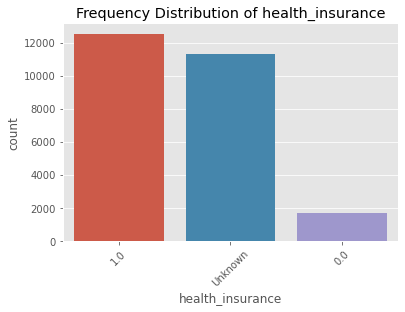

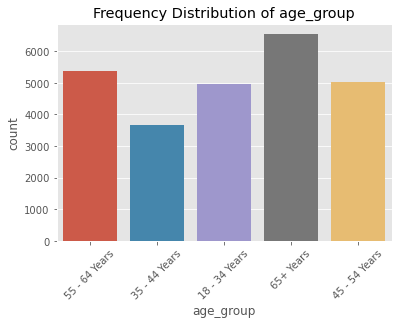

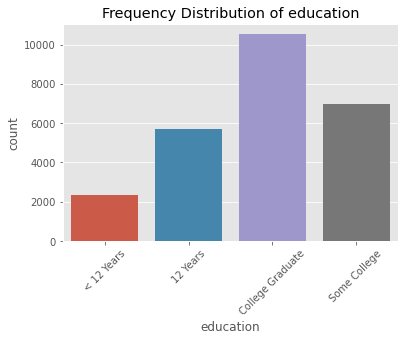

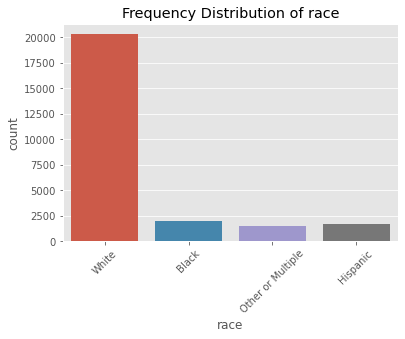

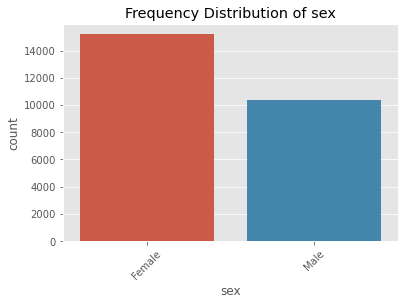

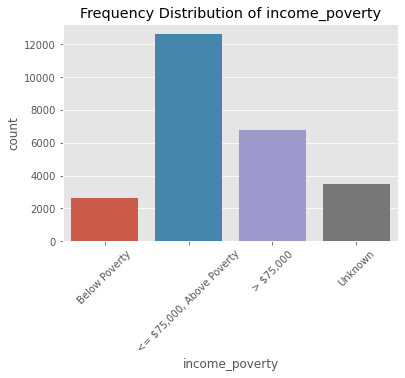

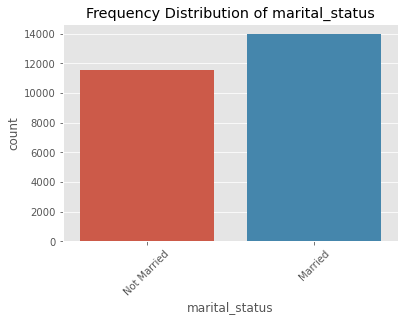

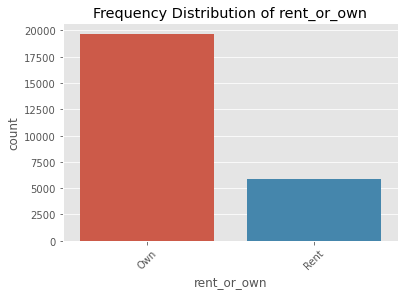

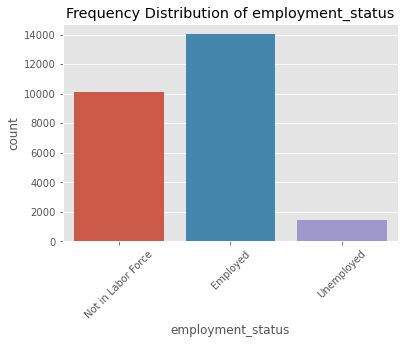

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df_train.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df_train)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title("Frequency Distribution of {}".format(column))
    plt.show()


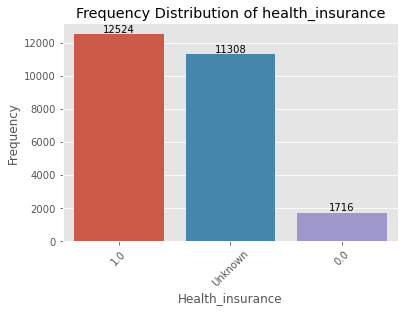

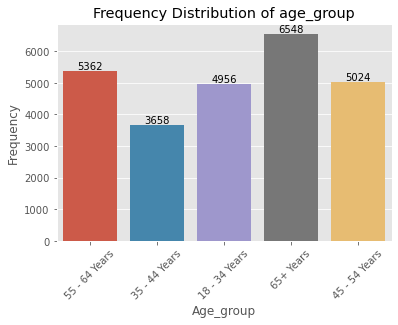

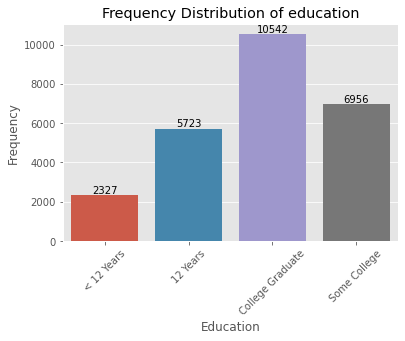

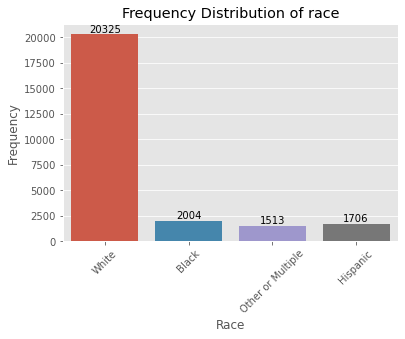

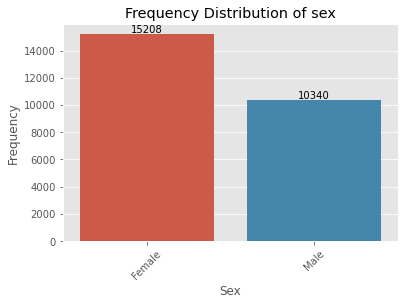

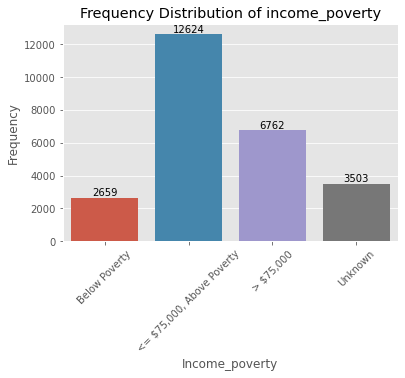

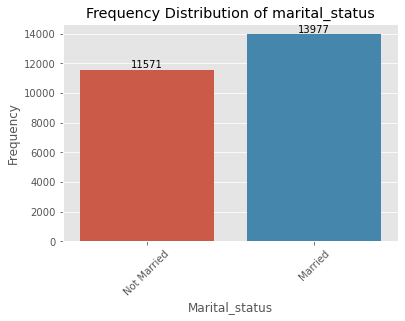

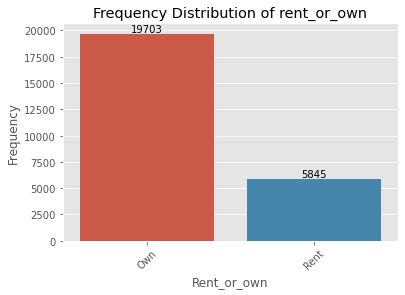

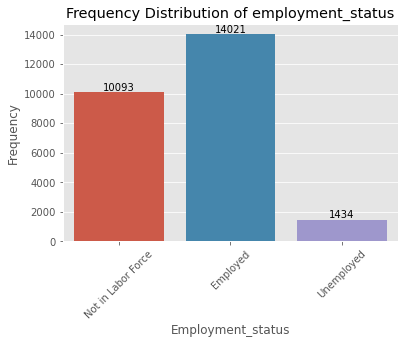

In [63]:

for column in df_train.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df_train)
    plt.xlabel(column.capitalize())  # Label for x-axis
    plt.ylabel("Frequency")           # Label for y-axis
    plt.xticks(rotation=45)           # Rotate x-axis labels for better readability
    plt.title("Frequency Distribution of {}".format(column))
    
    # Add labels to the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()


We look at features in the training data 
Univariate Analysis
Plotting feature distributions


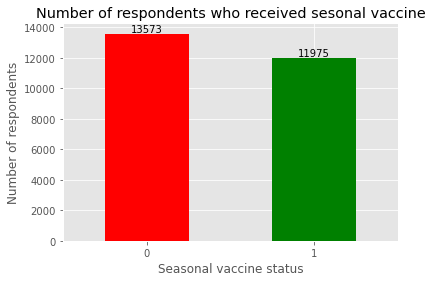

In [64]:
ax = df_train['seasonal_vaccine'].value_counts().plot(kind='bar', color=['red', 'green'], title = 'Number of respondents who received sesonal vaccine')
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel('Seasonal vaccine status')
ax.set_ylabel('Number of respondents')
# Add labels to the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(round(i.get_height(), 2)), ha='center', va='bottom')

# plt.show()


A total of 11,967 people received the vaccine compared to 13,558 people who did not receive the seasonal vaccine 

In [65]:
# from matplotlib.pyplot import figure
# # Frequency Distribution
# figure(figsize=(10, 6))
# sns.countplot(x='seasonal_vaccine', data=df_train)
# plt.title('Frequency Distribution of Seasonal Vaccine')
# plt.xlabel('Categories')
# plt.ylabel('Frequency')
# plt.show()

# # Percentage Distribution
# plt.figure(figsize=(10, 6))
# (df_train['seasonal_vaccine'].value_counts(normalize=True) * 100).plot(kind='bar')
# plt.title('Percentage Distribution of Seasonal Vaccine')
# plt.xlabel('Categories')
# plt.ylabel('Percentage')
# plt.show()

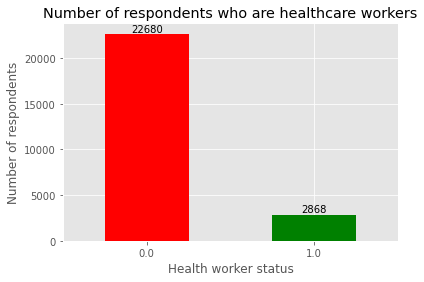

In [66]:
ax = df_train['health_worker'].value_counts().plot(kind='bar',color=['red', 'green'], title = 'Number of respondents who are healthcare workers')
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel('Health worker status')
ax.set_ylabel('Number of respondents')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(round(i.get_height(), 2)), ha='center', va='bottom')


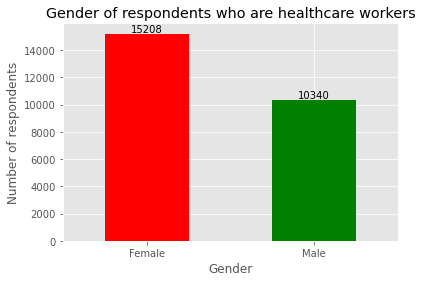

In [67]:
ax = df_train['sex'].value_counts().plot(kind='bar',color=['red', 'green'], title = 'Gender of respondents who are healthcare workers')
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of respondents')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(round(i.get_height(), 2)), ha='center', va='bottom')


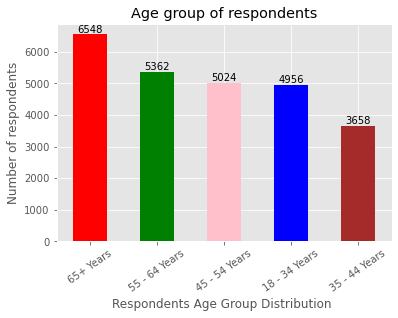

In [68]:
ax = df_train['age_group'].value_counts().plot(kind='bar', color=['red', 'green','pink','blue','brown'],title = 'Age group of respondents')
ax.tick_params(axis='x', rotation=35)
ax.set_xlabel('Respondents Age Group Distribution ')
ax.set_ylabel('Number of respondents')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(round(i.get_height(), 2)), ha='center', va='bottom')


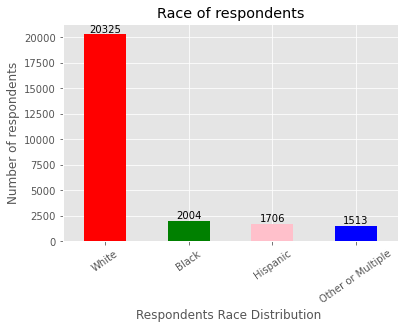

In [69]:
ax = df_train['race'].value_counts().plot(kind='bar',color=['red', 'green','pink','blue'], title = 'Race of respondents')
ax.tick_params(axis='x', rotation=35)
ax.set_xlabel('Respondents Race Distribution ')
ax.set_ylabel('Number of respondents')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(round(i.get_height(), 2)), ha='center', va='bottom')


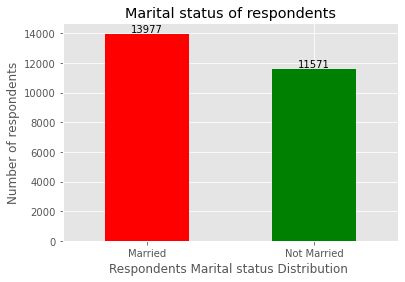

In [70]:
ax = df_train['marital_status'].value_counts().plot(kind='bar', color=['red', 'green'],title = 'Marital status of respondents')
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel('Respondents Marital status Distribution ')
ax.set_ylabel('Number of respondents')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(round(i.get_height(), 2)), ha='center', va='bottom')


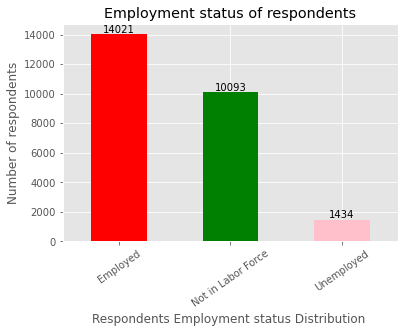

In [71]:
ax = df_train['employment_status'].value_counts().plot(kind='bar',color=['red', 'green','pink'], title = 'Employment status of respondents')
ax.tick_params(axis='x', rotation=35)
ax.set_xlabel('Respondents Employment status Distribution ')
ax.set_ylabel('Number of respondents')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(round(i.get_height(), 2)), ha='center', va='bottom')


### Feature relationships

Heatmap correlation
pairplot
Groupby comparisons

In [72]:
df_train.columns

Index(['seasonal_vaccine', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status'],
      dtype='object')

In [73]:
df_train.corr()

,seasonal_vaccine,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
seasonal_vaccine,1.000000,0.360137,0.170736,0.012411,0.127637,0.363594,0.393197,-0.063241
doctor_recc_seasonal,0.360137,1.000000,0.204153,0.037046,0.058115,0.174080,0.229394,0.023707
chronic_med_condition,0.170736,0.204153,1.000000,-0.001855,-0.026377,0.091745,0.162567,0.052537
child_under_6_months,0.012411,0.037046,-0.001855,1.000000,0.078686,0.003396,0.049940,0.036263
health_worker,0.127637,0.058115,-0.026377,0.078686,1.000000,0.029694,0.089430,-0.017268
opinion_seas_vacc_effective,0.363594,0.174080,0.091745,0.003396,0.029694,1.000000,0.345614,-0.020902
opinion_seas_risk,0.393197,0.229394,0.162567,0.049940,0.089430,0.345614,1.000000,0.198005
opinion_seas_sick_from_vacc,-0.063241,0.023707,0.052537,0.036263,-0.017268,-0.020902,0.198005,1.000000


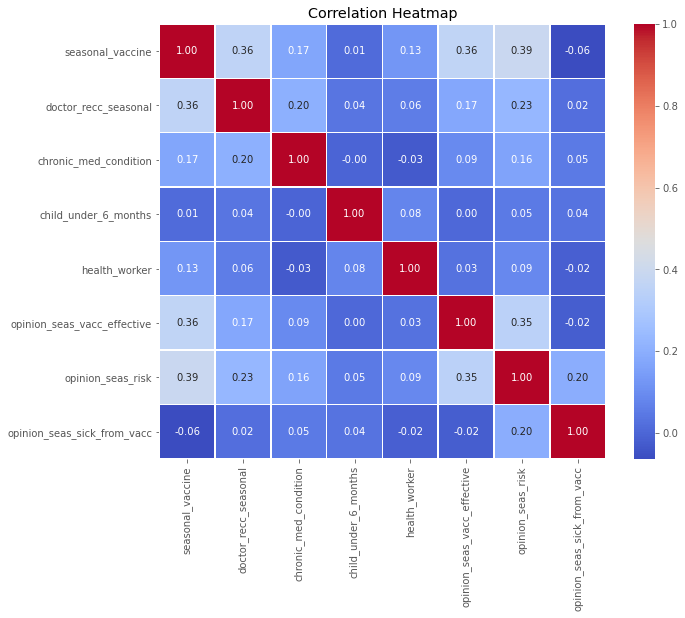

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [75]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
from tabulate import tabulate
from scipy.stats import chi2_contingency

# Cross-tabulation
cross_tab = pd.crosstab(df_train['seasonal_vaccine'], df_train['opinion_seas_risk'])

# Chi-square Test
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Create DataFrame for cross-tabulation
df_cross_tab = pd.DataFrame(cross_tab)

# Create DataFrame for chi-square test results
df_chi_square = pd.DataFrame({
    'Chi-square value': [chi2],
    'p-value': [p]
})

# Convert DataFrames to tabulated format
cross_tab_table = tabulate(df_cross_tab, headers='keys', tablefmt='pretty')
chi_square_table = tabulate(df_chi_square, headers='keys', tablefmt='pretty')

# Print the tabulated output
print("Cross-tabulation:")
print(cross_tab_table)
print("\nChi-square Test Results:")
print(chi_square_table)


Cross-tabulation:
+------------------+------+------+-----+------+------+
| seasonal_vaccine | 1.0  | 2.0  | 3.0 | 4.0  | 5.0  |
+------------------+------+------+-----+------+------+
|        0         | 4587 | 5477 | 274 | 2500 | 735  |
|        1         | 1199 | 3274 | 352 | 4973 | 2177 |
+------------------+------+------+-----+------+------+

Chi-square Test Results:
+---+--------------------+---------+
|   |  Chi-square value  | p-value |
+---+--------------------+---------+
| 0 | 3996.2815705322864 |   0.0   |
+---+--------------------+---------+


Since the p-value is very low (nearly zero), we reject the null hypothesis that there is no association between receiving the seasonal vaccine and the respondents opinion on the perceived risk of seasonal flu.

The significant chi-square value (3993.46) indicates a substantial discrepancy between the observed and expected frequencies, further supporting the rejection of the null hypothesis.

Therefore, we can conclude that there is a statistically significant association between the receipt of the seasonal vaccine and the respondent's opinion on the perceived risk of seasonal flu.

In [77]:
from tabulate import tabulate
import pandas as pd
from scipy.stats import chi2_contingency

# Cross-tabulation
cross_tab = pd.crosstab(df_train['seasonal_vaccine'], df_train['doctor_recc_seasonal'])

# Chi-square Test
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Create DataFrame for output
df_output = pd.DataFrame({
    'Seasonal Vaccine': cross_tab.index,
    'No Doctor Recommendation': cross_tab[0],
    'Doctor Recommendation': cross_tab[1]
})
df_output.index.name = 'Received Seasonal Vaccine'

# Add chi-square test results to DataFrame
df_output.loc['Chi-square test'] = ['-', chi2, '-']
df_output.loc['p-value'] = ['-', p, '-']

# Convert DataFrame to a tabulated format
output_table = tabulate(df_output, headers='keys', tablefmt='pretty')

# Display the tabulated output
print(output_table)


+---------------------------+------------------+--------------------------+-----------------------+
| Received Seasonal Vaccine | Seasonal Vaccine | No Doctor Recommendation | Doctor Recommendation |
+---------------------------+------------------+--------------------------+-----------------------+
|             0             |        0         |         11534.0          |         2039          |
|             1             |        1         |          6193.0          |         5782          |
|      Chi-square test      |        -         |    3311.9818202503693    |           -           |
|          p-value          |        -         |           0.0            |           -           |
+---------------------------+------------------+--------------------------+-----------------------+


With a very low p-value (approximately 0), we reject the null hypothesis that there is no association between receiving a doctor's recommendation for the seasonal flu vaccine and actually receiving the vaccine.

The significant chi-square value (3305.39) indicates a notable deviation between the observed and expected frequencies, further supporting the rejection of the null hypothesis.

Therefore, we can conclude that there is a statistically significant association between receiving a doctor's recommendation for the seasonal flu vaccine and actually receiving the vaccine.

In [78]:
# # Create a contingency table
# contingency_table = pd.crosstab(df_train['seasonal_vaccine'], df_train['opinion_seas_sick_from_vacc'])

# # Plot the heatmap
# sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')

# # Set labels and title
# plt.xlabel('seasonal_vaccine')
# plt.ylabel('Sickness likelihood Opinion')
# # plt.title('Heatmap of Two Categorical Variables')

# plt.show()

### Multivariate Analysis

<Figure size 720x576 with 0 Axes>

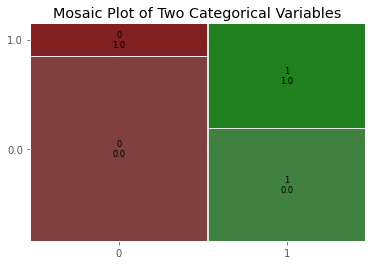

In [79]:

# Mosaic Plot
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(10, 8))
mosaic(df_train, ['seasonal_vaccine', 'doctor_recc_seasonal'])
plt.title('Mosaic Plot of Two Categorical Variables')
plt.show()

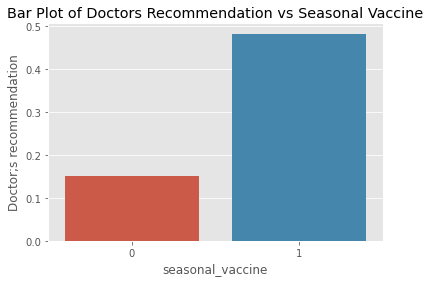

In [80]:
# Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='seasonal_vaccine', y='doctor_recc_seasonal', data=df_train, ci=None)
plt.title('Bar Plot of Doctors Recommendation vs Seasonal Vaccine')
plt.ylabel('Doctor;s recommendation')
plt.xlabel('seasonal_vaccine')
plt.show()

People are more likely to take up the seasonal vaccine on the recommendation of a doctor

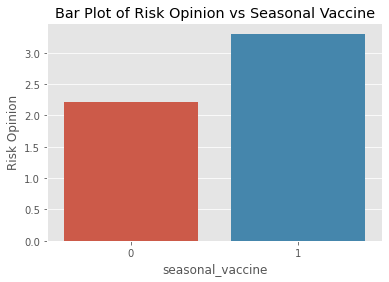

In [81]:
# Bar Plot
plt.figure(figsize=(6,4))
sns.barplot(x='seasonal_vaccine', y='opinion_seas_risk', data=df_train, ci=None)
plt.title('Bar Plot of Risk Opinion vs Seasonal Vaccine')
plt.ylabel('Risk Opinion')
plt.xlabel('seasonal_vaccine')
plt.show()


People with a higher perception of risk of falling sick without the vaccine are more likely to take up the seasonal vaccine

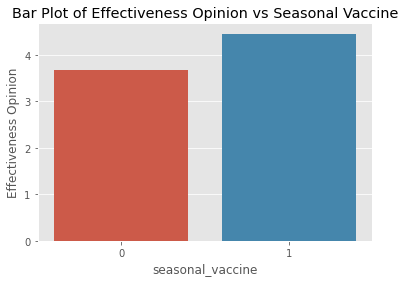

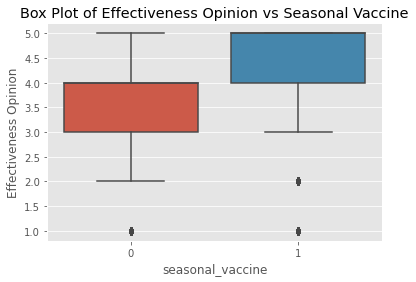

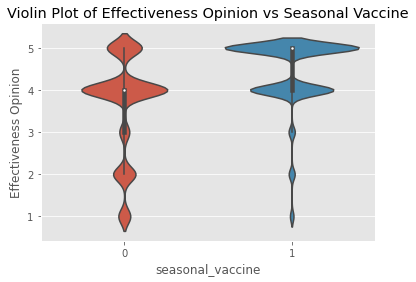

In [82]:
# Bar Plot
plt.figure(figsize=(6,4))
sns.barplot(x='seasonal_vaccine', y='opinion_seas_vacc_effective', data=df_train, ci=None)
plt.title('Bar Plot of Effectiveness Opinion vs Seasonal Vaccine')
plt.ylabel('Effectiveness Opinion')
plt.xlabel('seasonal_vaccine')
plt.show()

# Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='seasonal_vaccine', y='opinion_seas_vacc_effective', data=df_train)
plt.title('Box Plot of Effectiveness Opinion vs Seasonal Vaccine')
plt.ylabel('Effectiveness Opinion')
plt.xlabel('seasonal_vaccine')
plt.show()

# Violin Plot
plt.figure(figsize=(6,4))
sns.violinplot(x='seasonal_vaccine', y='opinion_seas_vacc_effective', data=df_train)
plt.title('Violin Plot of Effectiveness Opinion vs Seasonal Vaccine')
plt.ylabel('Effectiveness Opinion')
plt.xlabel('seasonal_vaccine')
plt.show()

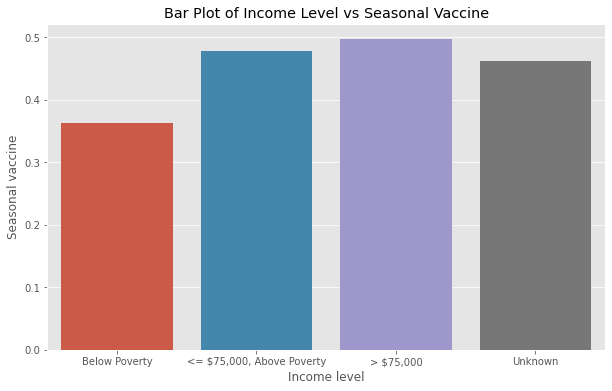

In [83]:
# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='income_poverty', y='seasonal_vaccine', data=df_train, ci=None)
plt.title('Bar Plot of Income Level vs Seasonal Vaccine')
plt.xlabel('Income level')
plt.ylabel('Seasonal vaccine')
plt.show()


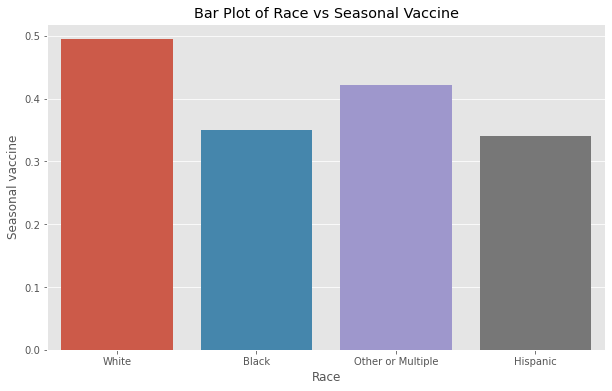

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='race', y='seasonal_vaccine', data=df_train, ci=None)
plt.title('Bar Plot of Race vs Seasonal Vaccine')
plt.xlabel('Race')
plt.ylabel('Seasonal vaccine')


plt.show()

White people are likely to take up the vaccine, followed by the other races. People from the black and hispanic races are the least likely to take up the seasonal vaccine. 

People with a reasonable income that is, those who live above the poverty line and earn up to USD 75000 are more likely to take up the vaccine compared to other income catergories. People who live below the poverty line are the least likely to take up the vaccine. 

In [85]:
for column in df_train.columns:
    print(f"Counts for column '{column}':")
    print(df_train[column].value_counts())
    print()

Counts for column 'seasonal_vaccine':
0    13573
1    11975
Name: seasonal_vaccine, dtype: int64

Counts for column 'doctor_recc_seasonal':
0.0    17727
1.0     7821
Name: doctor_recc_seasonal, dtype: int64

Counts for column 'chronic_med_condition':
0.0    18307
1.0     7241
Name: chronic_med_condition, dtype: int64

Counts for column 'child_under_6_months':
0.0    23435
1.0     2113
Name: child_under_6_months, dtype: int64

Counts for column 'health_worker':
0.0    22680
1.0     2868
Name: health_worker, dtype: int64

Counts for column 'health_insurance':
1.0        12524
Unknown    11308
0.0         1716
Name: health_insurance, dtype: int64

Counts for column 'opinion_seas_vacc_effective':
4.0    11346
5.0     9755
2.0     2146
1.0     1163
3.0     1138
Name: opinion_seas_vacc_effective, dtype: int64

Counts for column 'opinion_seas_risk':
2.0    8751
4.0    7473
1.0    5786
5.0    2912
3.0     626
Name: opinion_seas_risk, dtype: int64

Counts for column 'opinion_seas_sick_from_vacc

check for one hot encoding 

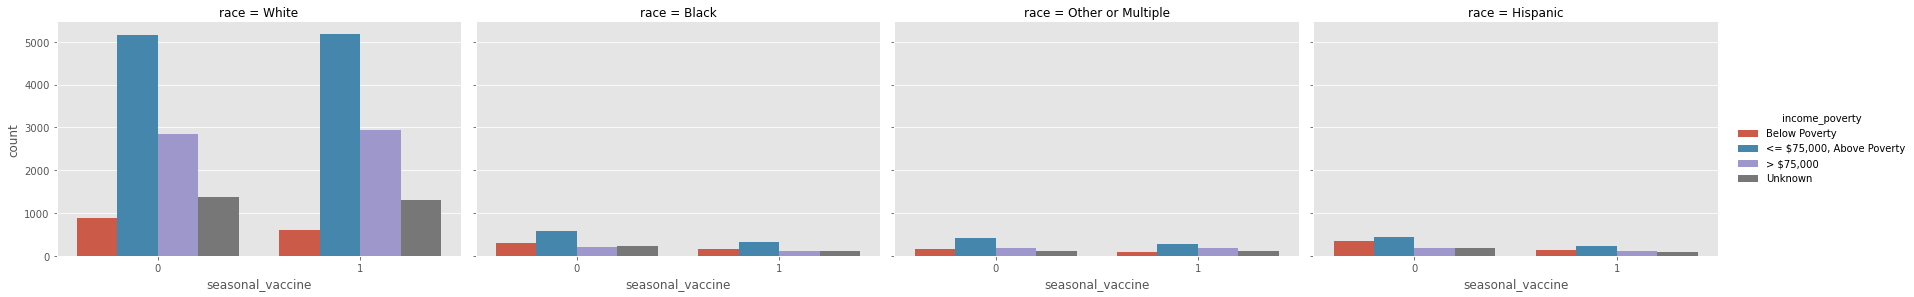

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the data
# Example of three categorical variables: 'gender', 'age_group', and 'education'
sns.catplot(x='seasonal_vaccine', hue='income_poverty', col='race', data=df_train, kind='count', height=4, aspect=1.5)
plt.show()

From the respondents, white people seem to be more weathy compared to the other races, however the ratios  of the people who took the vaccine against those who did not take up the vaccine seems equal irrespective of their income levels or their race. 

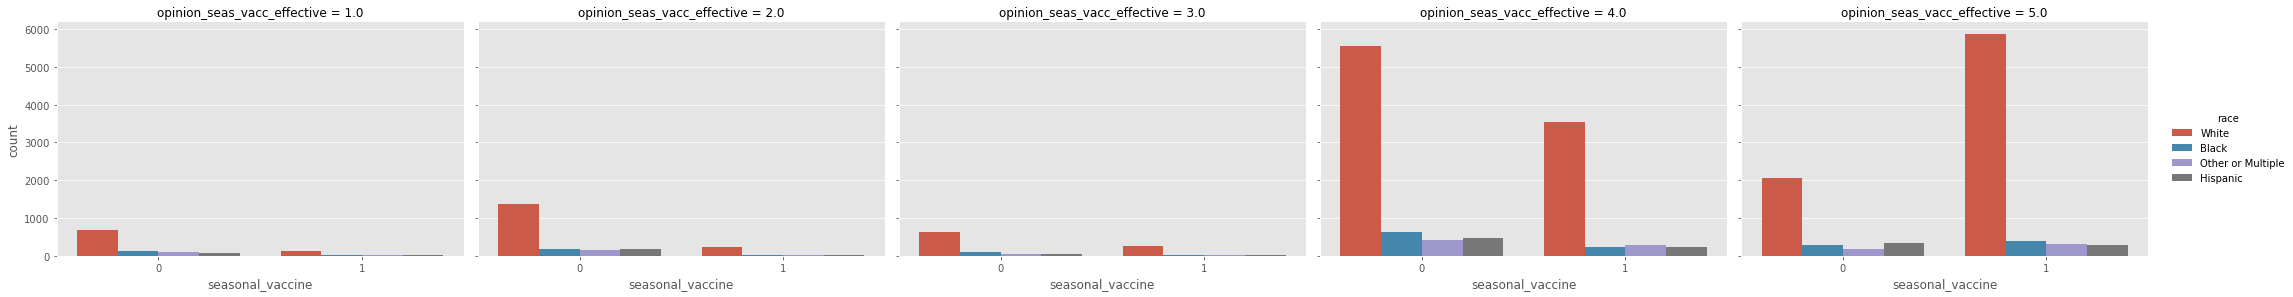

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the data
# Example of three categorical variables: 'gender', 'age_group', and 'education'
sns.catplot(x='seasonal_vaccine', hue='race', col='opinion_seas_vacc_effective', data=df_train, kind='count', height=4, aspect=1.5)
plt.show()

More white people rated the vaccine as effective compared to other races

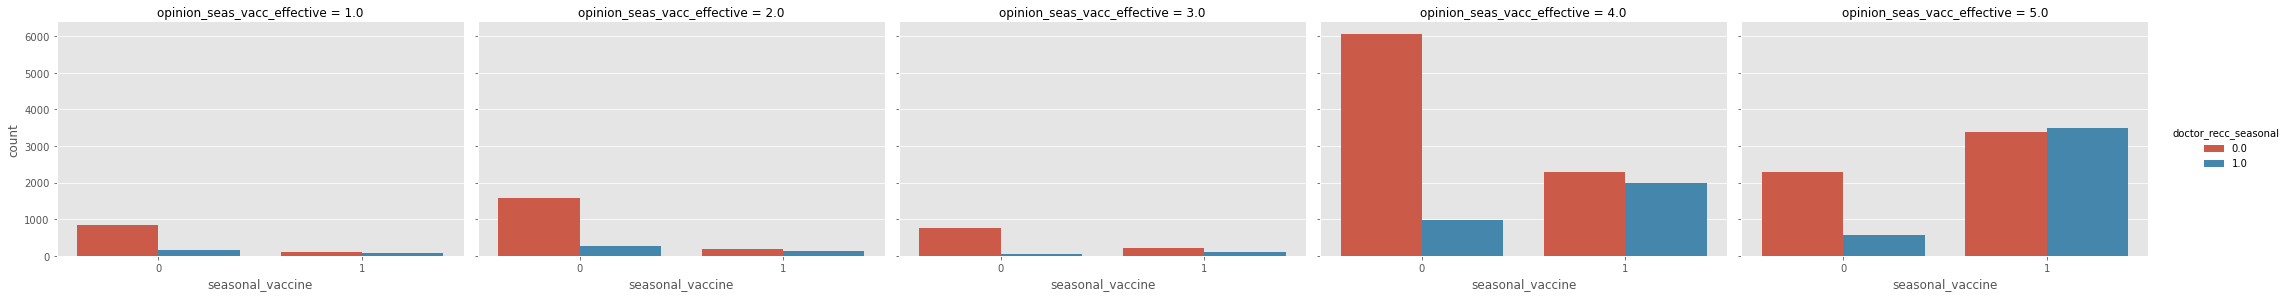

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the data
# Example of three categorical variables: 'gender', 'age_group', and 'education'
sns.catplot(x='seasonal_vaccine', hue='doctor_recc_seasonal', col='opinion_seas_vacc_effective', data=df_train, kind='count', height=4, aspect=1.5)
plt.show()

People perception on the effectiveness of the vaccine affects the likelihood of taking up the vaccine or not. Most people who perceived the vaccine as effective and rated it between 4-5 took up the seasonal vaccine.

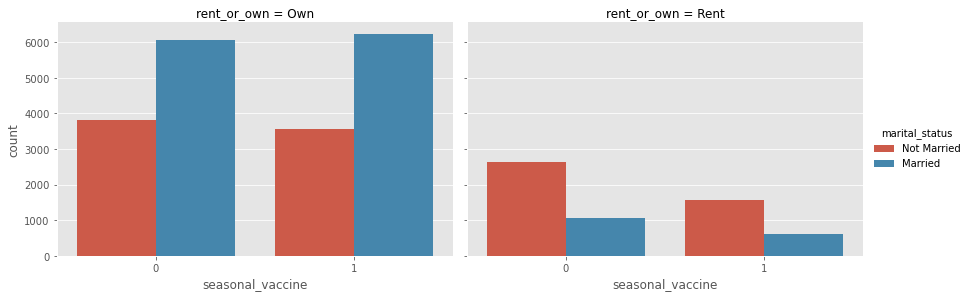

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the data
# Example of three categorical variables: 'gender', 'age_group', and 'education'
sns.catplot(x='seasonal_vaccine', hue='marital_status', col='rent_or_own', data=df_train, kind='count', height=4, aspect=1.5)
plt.show()

Genrally, marital status does not significantly affect the the likelihood of  people to take up the seasonal vaccine however from the data slightly more married peope took up the vaccine compared to ones not married. 

People who own their homes are more likely to take up the vaccine compared to people who rent. Of the people who own their homes, the married ones are more likely to take up the vaccines than the ones not married. 

Of the people who rent their homes, the single people are more likely to take up the vaccine compared to the married people. 

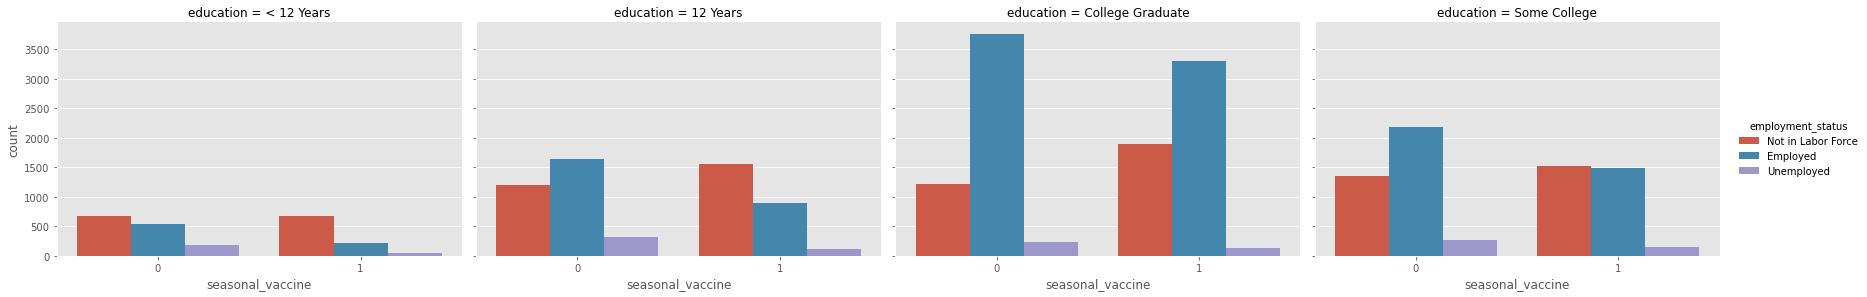

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the data
# Example of three categorical variables: 'gender', 'age_group', and 'education'
sns.catplot(x='seasonal_vaccine', hue='employment_status', col='education', data=df_train, kind='count', height=4, aspect=1.5)
plt.show()

Peope with a higher level of education are more likely to take up the vaccine as compared to people who have lower levels of education. Employed people and those not in the workforce are more likely to take up the vaccine as compared to the unemployed population. 

In [91]:
df_train.columns

Index(['seasonal_vaccine', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status'],
      dtype='object')

#### Model Selection:This is a classification problem, I start by selecting a few classification models to train. 
####  I will do the  Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines, and Support Vector Machines.

Perform one hot encoding on the data

In [92]:
import pandas as pd

# Columns to perform one-hot encoding on
columns_to_encode = ['opinion_seas_vacc_effective', 'health_insurance','opinion_seas_risk','marital_status', 'rent_or_own','sex','opinion_seas_sick_from_vacc','age_group','education','race','income_poverty','employment_status']

# Perform one-hot encoding
df_train_encoded = pd.get_dummies(df_train, columns=columns_to_encode)

# Display the encoded DataFrame
print(df_train_encoded.head())


   seasonal_vaccine  doctor_recc_seasonal  chronic_med_condition  \
0                 0                   0.0                    0.0   
1                 1                   0.0                    0.0   
2                 0                   0.0                    1.0   
3                 1                   1.0                    1.0   
4                 0                   0.0                    0.0   

   child_under_6_months  health_worker  opinion_seas_vacc_effective_1.0  \
0                   0.0            0.0                                0   
1                   0.0            0.0                                0   
2                   0.0            0.0                                0   
3                   0.0            0.0                                0   
4                   0.0            0.0                                0   

   opinion_seas_vacc_effective_2.0  opinion_seas_vacc_effective_3.0  \
0                                1                                0  

In [93]:
df_train_encoded.head()

,seasonal_vaccine,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective_1.0,opinion_seas_vacc_effective_2.0,opinion_seas_vacc_effective_3.0,opinion_seas_vacc_effective_4.0,opinion_seas_vacc_effective_5.0,health_insurance_0.0,health_insurance_1.0,health_insurance_Unknown,opinion_seas_risk_1.0,opinion_seas_risk_2.0,opinion_seas_risk_3.0,opinion_seas_risk_4.0,opinion_seas_risk_5.0,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,sex_Female,sex_Male,opinion_seas_sick_from_vacc_1.0,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
1,1,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
3,1,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0


Split the data into dependent and independent features

In [94]:
# Extract features (X) and target variable (y)
X = df_train_encoded.drop(columns=['seasonal_vaccine'])  
y = df_train_encoded['seasonal_vaccine']  

# Display the features (X) and target variable (y)
print("Features (X):")
print(X.head())  # Display the first few rows of features
print("\nTarget Variable (y):")
print(y.head())  # Display the first few rows of the target variable


Features (X):
   doctor_recc_seasonal  chronic_med_condition  child_under_6_months  \
0                   0.0                    0.0                   0.0   
1                   0.0                    0.0                   0.0   
2                   0.0                    1.0                   0.0   
3                   1.0                    1.0                   0.0   
4                   0.0                    0.0                   0.0   

   health_worker  opinion_seas_vacc_effective_1.0  \
0            0.0                                0   
1            0.0                                0   
2            0.0                                0   
3            0.0                                0   
4            0.0                                0   

   opinion_seas_vacc_effective_2.0  opinion_seas_vacc_effective_3.0  \
0                                1                                0   
1                                0                                0   
2                    

Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (20438, 48)
y_train shape: (20438,)
X_test shape: (5110, 48)
y_test shape: (5110,)


### Model Training 

### Logistic Regression

Initialize a logistic regression model using scikit-learn's LogisticRegression class.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize logistic regression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.7802348336594912

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2803
           1       0.76      0.75      0.75      2307

    accuracy                           0.78      5110
   macro avg       0.78      0.78      0.78      5110
weighted avg       0.78      0.78      0.78      5110


Confusion Matrix:
[[2263  540]
 [ 583 1724]]


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7802348336594912
Precision: 0.7614840989399293
Recall: 0.7472908539228436
F1-score: 0.7543207175672718
ROC-AUC score: 0.7773200612817928
Confusion Matrix:
[[2263  540]
 [ 583 1724]]


From the accuracy score we see round **78.02%** of the instances in the test set were predicted correctly by the model.

The precision score shows that of all the instances predicted as positive by the model, around **76.15%** were actually positive.

From the recall score we see that the model correctly identified around **74.73%** of all actual positive instances in the dataset.

The F1-score is approximately **75.43%.** It takes into account both precision and recall, providing a balanced measure of the model's performance.

The ROC-AUC score is approximately **77.73%.** A higher ROC-AUC score indicates better discrimination between positive and negative instances.

The confusuion matrix shows that there are **2263 true negative predictions** (actual negative instances correctly classified as negative), **540 false positive predictions** (actual negative instances incorrectly classified as positive), **583 false negative predictions** (actual positive instances incorrectly classified as negative), and **1724 true positive predictions** (actual positive instances correctly classified as positive).

### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


# Initialize DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6798434442270058

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2803
           1       0.65      0.64      0.64      2307

    accuracy                           0.68      5110
   macro avg       0.68      0.68      0.68      5110
weighted avg       0.68      0.68      0.68      5110

ROC-AUC score: 0.6766449842194899

Confusion Matrix:
[[1989  814]
 [ 822 1485]]


The accuracy score indicates that around 68.18% of the instances in the test set were predicted correctly by the model.

From the classification report we see that:
For class 0 (negative class), precision is 0.71, recall is 0.71, and F1-score is 0.71.
For class 1 (positive class), precision is 0.65, recall is 0.64, and F1-score is 0.65.

The confusion matrix shows that there are 1996 true negative predictions, 807 false positive predictions, 819 false negative predictions, and 1488 true positive predictions.

In [99]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Visualize the decision tree
# plt.figure(figsize=(15, 10))
# plot_tree(decision_tree_classifier, filled=True, feature_names=X_train.columns, class_names=['0', '1'], fontsize=10)
# plt.show()


### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

# Fit the model to the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7504892367906066

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2803
           1       0.73      0.72      0.72      2307

    accuracy                           0.75      5110
   macro avg       0.75      0.75      0.75      5110
weighted avg       0.75      0.75      0.75      5110


Confusion Matrix:
[[2175  628]
 [ 647 1660]]


The accuracy score indicates that around 75.38% of the instances in the test set were predicted correctly by the Random Forest classifier.

From the classification report we see that:
For class 0 (negative class), precision is 0.78, recall is 0.77, and F1-score is 0.78.
For class 1 (positive class), precision is 0.73, recall is 0.73, and F1-score is 0.73.

The confusion matrix shows that there are 2168 true negative predictions, 635 false positive predictions, 623 false negative predictions, and 1684 true positive predictions.

### Gradient Boosting 

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier()

# Fit the model to the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7837573385518591

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2803
           1       0.76      0.76      0.76      2307

    accuracy                           0.78      5110
   macro avg       0.78      0.78      0.78      5110
weighted avg       0.78      0.78      0.78      5110


Confusion Matrix:
[[2248  555]
 [ 550 1757]]


The accuracy score indicates that around 78.38% of the instances in the test set were predicted correctly by the Random Forest classifier.

From the classification report we see that:
For class 0 (negative class), precision is 0.80, recall is 0.80, and F1-score is 0.80.
For class 1 (positive class), precision is 0.76, recall is 0.76, and F1-score is 0.76.

The confusion matrix shows that there are 2248 true negative predictions, 555 false positive predictions, 550 false negative predictions, and 1757 true positive predictions.

### Support Vector Machines

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Support Vector Classifier
svm_classifier = SVC()

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7806262230919765

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2803
           1       0.76      0.76      0.76      2307

    accuracy                           0.78      5110
   macro avg       0.78      0.78      0.78      5110
weighted avg       0.78      0.78      0.78      5110


Confusion Matrix:
[[2239  564]
 [ 557 1750]]


The accuracy score indicates that around 78.06% of the instances in the test set were predicted correctly by the Random Forest classifier.

From the classification report we see that:
For class 0 (negative class), precision is 0.80, recall is 0.80, and F1-score is 0.80.
For class 1 (positive class), precision is 0.76, recall is 0.76, and F1-score is 0.76.

The confusion matrix shows that there are 2239 true negative predictions, 564 false positive predictions, 557 false negative predictions, and 1750 true positive predictions.